<a href="https://colab.research.google.com/github/Haseebk0678/CISC3440-Machine-Learning/blob/main/HW2/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates classification with the MNIST dataset - a dataset for handwritten number recognition. Our goal is to look at a picture of a handwritten digit between 0 and 9, and try to recognize what digit it is.

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

MNIST with binary classification

In [3]:
# Fetch the MNIST data using sklearn
mnist = fetch_openml('mnist_784', version=1)

In [4]:
# For this binary classification task, we will try to classify the MNIST digits
# as 5/not-5. We can use the structure of the sklearn MNIST data to get both our
# data and labels:
X = mnist.data
y = mnist.target

Label:  2


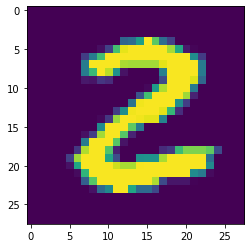

In [5]:
# As an example, plot a row from the dataset. You can see different examples
# by rerunning this cell with different values of I.
I = 25

print("Label: ", y[I])
plt.imshow(X.iloc[I].values.reshape(28,28))
plt.show()

In [6]:
# Currently, targets are strings containing the number associated with each row
# of target data. We need to change this to a binary 5/not-5 value.
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [7]:
# We can do this with a simple Boolean expression:
y_5 = y == '5'
y_5

0         True
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 70000, dtype: bool

In [8]:
# Retrieve the train/test split from the dataset.
# The MNIST digits are already divided into a train/test split:
# the first 60,000 rows are the training set, and the rest are the test set.
X_train, y_train_5, X_test, y_test_5 = X[:60000], y_5[:60000], X[60000:], y_5[60000:]

len(X_train), len(X_test)

(60000, 10000)

In [9]:
# Let's do a 3-fold cross validation to evaluate two different models.

model_sgd = SGDClassifier()
sgd_scores = cross_val_score(model_sgd, X_train, y_train_5, cv=3, scoring="f1")

In [10]:
sgd_scores

array([0.81319275, 0.81385281, 0.71337868])

In [11]:
model_knn = KNeighborsClassifier()
knn_scores = cross_val_score(model_knn, X_train, y_train_5, cv=3, scoring="f1")

In [12]:
knn_scores

array([0.9671675 , 0.9610245 , 0.96143097])

MNIST with multiclass classification

In [14]:
# Try K-NN. This time, we'll evaluate on accuracy, since that is
# what the homework wants.

# We are doing multiclass classification. Get the original numeric data:
y_train_multiclass, y_test_multiclass =y[:60000], y[60000:]
y_train_multiclass

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [18]:
from sklearn import metrics
model_knn = KNeighborsClassifier(n_neighbors = 4, weights = "distance")

knn_scores = cross_val_score(model_knn, X_train, y_train_multiclass, cv=3, verbose=2, scoring="accuracy")
print("KNN", knn_scores)
model_knn.fit(X_train, y_train_multiclass)
y_pred = model_knn.predict(X_test)
metrics.f1_score(y_test_multiclass, y_pred, average='weighted')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  57.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.9s remaining:    0.0s


[CV] END .................................................... total time=  54.1s
[CV] END .................................................... total time=  54.0s
KNN [0.9709  0.9698  0.97035]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.8min finished


0.9713597782738583

In [17]:

# The best value ends up being n_neighbors = 4 i'll spare you the 28 minutes needed to run this

knn = KNeighborsClassifier(weights = 'distance')
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 15))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv = 2, scoring='accuracy', return_train_score=False,verbose=2)
grid_search=grid.fit(X_train, y_train_multiclass)
print(grid_search.best_params_)

Fitting 2 folds for each of 14 candidates, totalling 28 fits
[CV] END ......................................n_neighbors=1; total time=  49.4s
[CV] END ......................................n_neighbors=1; total time=  49.5s
[CV] END ......................................n_neighbors=2; total time=  51.0s
[CV] END ......................................n_neighbors=2; total time=  51.2s
[CV] END ......................................n_neighbors=3; total time=  52.5s
[CV] END ......................................n_neighbors=3; total time=  53.0s
[CV] END ......................................n_neighbors=4; total time=  57.5s
[CV] END ......................................n_neighbors=4; total time=  56.5s
[CV] END ......................................n_neighbors=5; total time=  57.4s
[CV] END ......................................n_neighbors=5; total time=  59.6s
[CV] END ......................................n_neighbors=6; total time=  58.0s
[CV] END ......................................n